In [0]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import cifar10

# use Keras to import pre-shuffled cifar10 database
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("The cifar10 database has a training set of %d examples." % len(X_train))
print("The cifar10 database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


170500096/170498071 [==============================] - 32s 0us/step
The cifar10 database has a training set of 50000 examples.
The cifar10 database has a test set of 10000 examples.


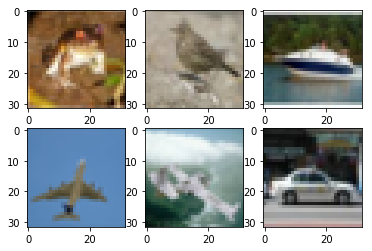

In [3]:
# Visualizing the images
plt.subplot(2,3,1)
plt.imshow(X_train[0])

plt.subplot(2,3,2)
plt.imshow(X_train[120])

plt.subplot(2,3,3)
plt.imshow(X_train[1300])

plt.subplot(2,3,4)
plt.imshow(X_train[3049])

plt.subplot(2,3,5)
plt.imshow(X_train[3644])

plt.subplot(2,3,6)
plt.imshow(X_train[5149])

In [0]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [5]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
# Creating the CNN model
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,BatchNormalization,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D

In [15]:
classifier = Sequential()

# Convolutional Layers
classifier.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), padding = "same"))
classifier.add(BatchNormalization())
classifier.add(Activation("relu"))
classifier.add(Conv2D(32, (3, 3), padding = "same"))
classifier.add(BatchNormalization())
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(p = 0.5))

classifier.add(Conv2D(64, (3, 3), padding = "same"))
classifier.add(BatchNormalization())
classifier.add(Activation("relu"))
classifier.add(Conv2D(64, (3, 3), padding = "same"))
classifier.add(BatchNormalization())
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(p = 0.4))

classifier.add(Conv2D(128, (3, 3),padding = "same"))
classifier.add(BatchNormalization())
classifier.add(Activation("relu"))
classifier.add(Conv2D(256, (3, 3), padding = "same"))
classifier.add(BatchNormalization())
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(p = 0.2))

# Fully connected Layers
classifier.add(GlobalAveragePooling2D())
classifier.add(Dense(10,activation = "softmax"))

classifier.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.4)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [0]:
# Compiling the model
classifier.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [0]:
# Creating callbacks
from keras.callbacks import ModelCheckpoint,EarlyStopping   

checkpointer = ModelCheckpoint(filepath='cifar10_weights.hdf5', save_best_only=True)
earlystopper = EarlyStopping(monitor = "val_acc", patience=30)

In [18]:
# train the model
classifier.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[checkpointer])

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 15s 383us/step - loss: 1.4179 - acc: 0.4838 - val_loss: 1.9747 - val_acc: 0.3746
Epoch 2/200
40000/40000 [==============================] - 14s 351us/step - loss: 1.0687 - acc: 0.6195 - val_loss: 1.0318 - val_acc: 0.6335
Epoch 3/200
40000/40000 [==============================] - 14s 351us/step - loss: 0.9272 - acc: 0.6721 - val_loss: 1.3218 - val_acc: 0.5701
Epoch 4/200
40000/40000 [==============================] - 14s 359us/step - loss: 0.8394 - acc: 0.7049 - val_loss: 1.0188 - val_acc: 0.6522
Epoch 5/200
40000/40000 [==============================] - 15s 385us/step - loss: 0.7810 - acc: 0.7258 - val_loss: 0.7516 - val_acc: 0.7436
Epoch 6/200
40000/40000 [==============================] - 14s 349us/step - loss: 0.7277 - acc: 0.7458 - val_loss: 0.8074 - val_acc: 0.7253
Epoch 7/200
40000/40000 [==============================] - 14s 351us/step - loss: 0.6882 - acc: 0.7589 - val_l

In [19]:
# load the weights that yielded the best validation accuracy
classifier.load_weights('cifar10_weights.hdf5')

# evaluate test accuracy
score = classifier.evaluate(X_test, y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)

10000/10000 [==============================] - 1s 94us/step
Test accuracy: 86.20%


**Thank You**